In [10]:
import pandas as pd

In [11]:
sim_rates_fp = "../data/growth_rates/growth/growth_rates.csv"
real_rates_fp = "../data/actual_growth_rates_genus_2/F01_actual_growth_rates_by_genus.csv"

sim_rates_long = pd.read_csv(sim_rates_fp)
real_rates_wide = pd.read_csv(real_rates_fp)


real_rates_wide = real_rates_wide.rename(columns={"Genus": "taxon"})

In [12]:
real_rates_long = pd.melt(real_rates_wide, id_vars=["taxon"], var_name="sample_id", value_name="log2fc_rel_abundance")

real_rates_long["sample_id"] = real_rates_long["sample_id"].astype(str)
sim_rates_long["sample_id"] = sim_rates_long["sample_id"].astype(str)

In [13]:
real_rates_long

,taxon,sample_id,log2fc_rel_abundance
0,g__Abiotrophia,1200528000,0.000000
1,g__Acetanaerobacterium,1200528000,0.000000
2,g__Acetobacter,1200528000,0.000000
3,g__Acidaminococcus,1200528000,0.000000
4,g__Acinetobacter,1200528000,0.000000
...,...,...,...
16031,g__[Eubacterium]_ruminantium_group,1207008000,0.944578
16032,g__[Eubacterium]_siraeum_group,1207008000,0.674262
16033,g__env.OPS_17,1207008000,0.000000
16034,g__uncultured,1207008000,0.000000


In [14]:
merged_rates_long = pd.merge(sim_rates_long, real_rates_long,
                             how="left",
                             on=["taxon", "sample_id"])



In [33]:
merged_rates_long.to_csv("merged_growth_long.csv")

In [15]:
merged_rates_long

,abundance,growth_rate,reactions,metabolites,taxon,tradeoff,sample_id,log2fc_rel_abundance
0,0.000206,0.010580,2445,1643,g__Actinomyces,0.7,1200528000,1.248527
1,0.096542,0.020119,2274,1386,g__Akkermansia,0.7,1200528000,-1.407158
2,0.033965,0.100684,2650,1613,g__Alistipes,0.7,1200528000,-1.641719
3,0.006793,0.037675,2034,1491,g__Anaerostipes,0.7,1200528000,-1.477086
4,0.593454,0.482416,3307,1887,g__Bacteroides,0.7,1200528000,-0.278090
...,...,...,...,...,...,...,...,...
1821,0.004389,0.016441,2870,1747,g__Parabacteroides,0.7,1207094400,NaN
1822,0.000693,0.047193,1019,945,g__Phascolarctobacterium,0.7,1207094400,NaN
1823,0.000231,0.009774,2896,1822,g__Streptococcus,0.7,1207094400,NaN
1824,0.112728,0.119230,1731,1301,g__Subdoligranulum,0.7,1207094400,NaN


In [19]:
xtreme_log2fc = merged_rates_long[(merged_rates_long["log2fc_rel_abundance"] > 20) | (merged_rates_long["log2fc_rel_abundance"] < -20)]
xtreme_log2fc

,abundance,growth_rate,reactions,metabolites,taxon,tradeoff,sample_id,log2fc_rel_abundance
160,0.121305,0.107500,1986,1472,g__Faecalibacterium,0.7,1201219200,-26.080028
180,0.042089,0.049291,1986,1472,g__Faecalibacterium,0.7,1201305600,26.715037
428,0.077473,0.194410,1330,1097,g__Anaerococcus,0.7,1202342400,-84.511660
433,0.023749,0.094902,1556,1235,g__Campylobacter,0.7,1202342400,-23.689109
449,0.079087,0.194377,1307,1115,g__Peptoniphilus,0.7,1202342400,-103.938791
700,0.019643,0.057303,1307,1115,g__Peptoniphilus,0.7,1203206400,-27.648910
850,0.686297,0.466938,3307,1887,g__Bacteroides,0.7,1203724800,-48.830929
855,0.044650,0.092973,1187,1056,g__Dialister,0.7,1203724800,-26.455616
861,0.043110,0.072539,1163,1052,g__Lachnospira,0.7,1203724800,-24.216714
874,0.282097,0.698871,3307,1887,g__Bacteroides,0.7,1203811200,45.895682


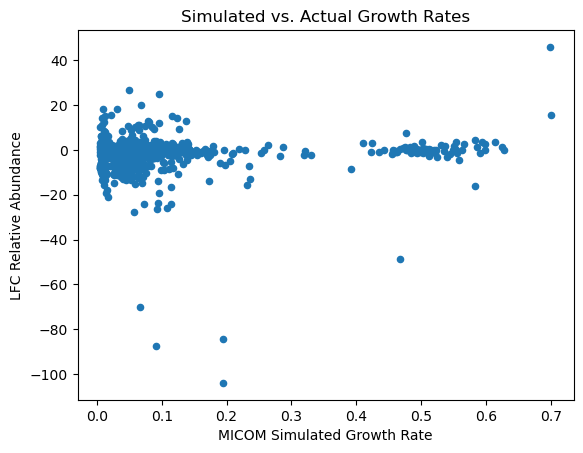

In [ ]:
import matplotlib.pyplot as plt

merged_rates_long.plot.scatter(x="growth_rate", y="log2fc_rel_abundance")

plt.title("Simulated vs. Actual Growth Rates")
plt.xlabel("MICOM Simulated Growth Rate")
plt.ylabel("LFC Relative Abundance")
#group by genus 

plt.show()

In [21]:
# normalize growth rates between 0 and 1 for each sample timepoint
merged_rates_long["growth_rate_norm"] = merged_rates_long.groupby("sample_id")["growth_rate"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
#print(extreme_changes)

In [28]:
merged_rates_long["sample_id"] = merged_rates_long["sample_id"].astype(int)

array([<Axes: xlabel='sample_id', ylabel='growth_rate_norm'>],
      dtype=object)

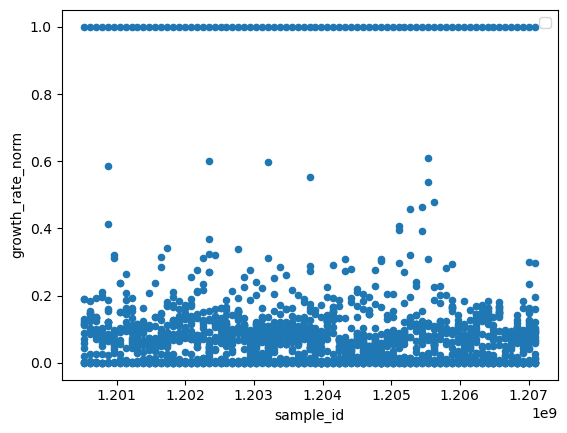

In [29]:
merged_rates_long.plot.scatter(x="sample_id", y="growth_rate_norm", subplots=True)

array([<Axes: xlabel='sample_id', ylabel='growth_rate'>], dtype=object)

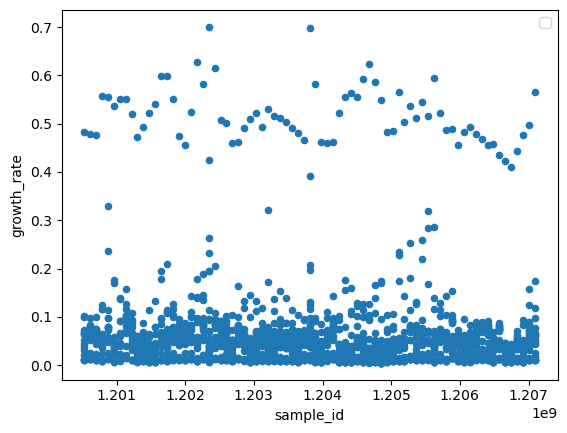

In [30]:
merged_rates_long.plot.scatter(x="sample_id", y="growth_rate", subplots=True)

- pick a couple of focused taxa to look at 
- sweep with diets, coop tradeoff 
- growth rate determination by rel abund at given time point 
- mixed effects model with all observations for one genus are grouped together (random effect --> genus)